# Graded Project

 
Working with data using Python Libraries, Visualization, EDA & Data Preprocessing.
:
A new football club named ‘GL United FC’ has just been inaugurated. This c ub
does not have a team yet. The team is looking to hire players for t eir ros er.
Management wants to make such decisions using a data based appr ach.
During a recent hiring drive, you were selected for the Data Science tea  as a
data scientist. Your team has been tasked with creating a repor  which
recommends players for the main team. To start with, a total of 15 pla ers are
required. Player data for all teams has been acquired from FIFA.  his data
contains information about the players, the clubs they are currently p aying for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regard ng potenndividual variables.

# Load and explore data

## 1. Import the required libraries and read the dataset

In [1]:
# import required libraries
import pandas as pd
from sklearn.impute import KNNImputer
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
# already imported as import pandas as pd
# fifa_ variable_information.csv is not loaded as this csv has only information of the variable in the data file fifa.csv

In [3]:
# Read the dataset
df = pd.read_csv('fifa.csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
# Display the first few rows of the dataframe
print(df.head())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [5]:
# Display the shape of the dataframe (number of rows and columns)
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (18207, 60)


In [6]:
# Display general information about the dataframe
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  181

## 3. Drop the columns which you think redundant for the analysis. (1 point)]

List of columns that can be dropped, with the reasons:
- Photo: Reason: This column contains URLs to the player's photos, which are irrelevant for performance analysis and decision-making
- Flag: Reason: This column contains URLs to the player's country flags, which do not contribute to evaluating player performance
- Club Logo: Reason: This column contains URLs to the logos of the clubs players are associated with. It is not necessary for assessing the players' capabilities
- Loaned From: Reason: Indicates if a player is loaned from another club. This might be relevant in some contexts, but it’s not essential for a performance-based selectio7rformance metrics
- Body Type: Reason: While this describes the player's physical build, it is subjective and might not be necessary for quantitatise9on your specific ential

The columns suggested for dropping (Photo, Flag, Club Logo, Loa,dClause, Bo Weight) do not interfere with the analysis tasks. By dropping the columns listed above, dataset can be streamlined to focus on the features that are more relevant for evaluating and recommending players based on performance.
ased on performance.

We will use cleaned DataFrame. 

The reasons are:

For Exploratory Analysis: If one's experimenting and might need to revert back to the original data frequently, using a cleaned DataFrame is often better. It provides flexibility and minimizes the risk of accidentally losing important data.

For Production Code or Final Analysis: If one's sure of the changes and want to optimize for memory usage and simplicity, using inplace=True might be more appropriate. However, one should consider making a backup of the original data before doing so.

Best Practice:
During the initial stages of analysis, it is better to start with creating a new "cleaned" DataFrame to preserve the original data.
Once one has finalized the analysis and are confident in the operations, one can decide to use inplace=True for efficiency in the final version of youDataFrame

In [7]:
# Check the shape and column names before dropping columns
original_shape = df.shape
original_columns = df.columns

print("Original Shape:", original_shape)
print("Original Columns:", list(original_columns))

Original Shape: (18207, 60)
Original Columns: ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [8]:
# Dropping the suggested columns by creating a new cleaned DataFrame
columns_to_drop = [
    'Photo', 'Flag', 'Club Logo', 'Loaned From', 'Body Type'
]

In [9]:
# Create a cleaned DataFrame without modifying the original one
df_cleaned = df.drop(columns=columns_to_drop)

In [10]:
# Check the shape and column names after dropping columns
new_shape = df_cleaned.shape
new_columns = df_cleaned.columns

print("\nNew Shape:", new_shape)
print("New Columns:", list(new_columns))


New Shape: (18207, 55)
New Columns: ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [11]:
# Ensure the number of rows is unchanged
assert original_shape[0] == new_shape[0], "Number of rows has changed!"

In [12]:
# Ensure key columns are still present in the cleaned DataFrame
key_columns = ['ID', 'Name', 'Overall', 'Wage']
for column in key_columns:
    assert column in new_columns, f"Key column {column} is missing!"

In [13]:
# Display the first few rows of the cleaned dataframe to verify the changes
df_cleaned.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Cleaning and Preprocessing

## 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. 
- Note: When the record/entry has "M"(indicates millions) as suffix you
need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you
need to multiply that value with 1000

In [14]:
# Display the first few rows of the 'Value', 'Wage', 'Release Clause' columns before cleaning
print("Data in 'Value', 'Wage', 'Release Clause' columns before cleaning:")
print(df_cleaned[['Value', 'Wage', 'Release Clause']].head())  # Ensure this print statement is executed

# Function to convert the string values to float with error handling
def convert_to_float(value):
    try:
        if isinstance(value, str):  # Check if the value is a string
            value = value.replace('€', '')  # Remove the currency symbol
            if 'M' in value:
                return float(value.replace('M', '')) * 1000000  # Convert million to float
            elif 'K' in value:
                return float(value.replace('K', '')) * 1000  # Convert thousand to float
            else:
                return float(value)  # Convert directly to float if no suffix
        else:
            return float(value)  # If the value is already a float, just return it
    except ValueError:
        print(f"ValueError: Could not convert '{value}' to float. Returning NaN.")
        return float('nan')  # Return NaN if conversion fails

# Apply the function to the 'Value', 'Wage', and 'Release Clause' columns with error trapping
try:
    df_cleaned['Value'] = df_cleaned['Value'].apply(convert_to_float)
    df_cleaned['Wage'] = df_cleaned['Wage'].apply(convert_to_float)
    df_cleaned['Release Clause'] = df_cleaned['Release Clause'].apply(convert_to_float)
except Exception as e:
    print(f"Error during conversion of financial columns: {e}")

# Check the shape and column names after conversion
new_shape = df_cleaned.shape
new_columns = df_cleaned.columns

print("\nNew Shape:", new_shape)
print("New Columns:", list(new_columns))

#  Display the first few rows to verify the conversion
print("\nData in 'Value', 'Wage', 'Release Clause' columns after cleaning:")
print(df_cleaned[['Value', 'Wage', 'Release Clause']].head())  # Ensure this print statement is executed

# Count and print the number of NaN values in the 'Value', 'Wage', and 'Release Clause' columns. This will be dealt later.
nan_counts = df_cleaned[['Value', 'Wage', 'Release Clause']].isna().sum()
print("\nNumber of NaN values in 'Value', 'Wage', 'Release Clause' columns after cleaning:")
print(nan_counts)


Data in 'Value', 'Wage', 'Release Clause' columns before cleaning:
     Value   Wage Release Clause
0  €110.5M  €565K        €226.5M
1     €77M  €405K        €127.1M
2  €118.5M  €290K        €228.1M
3     €72M  €260K        €138.6M
4    €102M  €355K        €196.4M

New Shape: (18207, 55)
New Columns: ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioni

## 5. Convert the column "Joined" into integer data type with keeping only the year. 

In [15]:
# Check the first few rows of the "Joined" column before cleaning
print("Data in 'Joined' column before cleaning:")
print(df_cleaned['Joined'].head())

# Convert the "Joined" column to datetime format with error handling
try:
    df_cleaned['Joined'] = pd.to_datetime(df_cleaned['Joined'], errors='coerce')
except Exception as e:
    print(f"Error during conversion to datetime: {e}")

# Step 3: Extract the year and convert it to an integer
try:
    df_cleaned['Joined'] = df_cleaned['Joined'].dt.year
except Exception as e:
    print(f"Error during extraction of year: {e}")

# Verify the changes by checking the first few rows
print("\nData in 'Joined' column after cleaning:")
print(df_cleaned['Joined'].head())

# Check for any remaining NaT values after conversion: This can be dealt later
nat_count = df_cleaned['Joined'].isna().sum()
if nat_count > 0:
    print(f"\nWarning: There are {nat_count} entries that could not be converted to a valid date.")


Data in 'Joined' column before cleaning:
0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

Data in 'Joined' column after cleaning:
0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64



## 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [16]:
# Check the first few rows of the "Contract Valid Until" column before cleaning
print("Data in 'Contract Valid Until' column before cleaning:")
print(df_cleaned['Contract Valid Until'].head())

# Convert the "Contract Valid Until" column to datetime format with error handling
try:
    df_cleaned['Contract Valid Until'] = pd.to_datetime(df_cleaned['Contract Valid Until'], errors='coerce')
except Exception as e:
    print(f"Error during conversion to datetime: {e}")

# Verify the conversion by checking the first few rows after cleaning
print("\nData in 'Contract Valid Until' column after cleaning:")
print(df_cleaned['Contract Valid Until'].head())

# Check for any remaining NaT values after conversion : This can be dealt later.
nat_count = df_cleaned['Contract Valid Until'].isna().sum()
if nat_count > 0:
    print(f"\nWarning: There are {nat_count} entries that could not be converted to a valid date.")

Data in 'Contract Valid Until' column before cleaning:
0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

Data in 'Contract Valid Until' column after cleaning:
0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]



## 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [17]:
# Check the first few rows of the 'Height' column before cleaning
print("Data in 'Height' column before cleaning:")
print(df_cleaned['Height'].head())

# Define a function to convert height in format 5'7" to inches as a float
def convert_height(height):
    try:
        if isinstance(height, str):  # Check if the value is a string
            feet, inches = height.split("'")
            inches = inches.replace('"', '')  # Remove the quotation mark from inches
            total_height = float(feet) * 12 + float(inches)
            return total_height
        else:
            return height  # If it's already a float or NaN, return it as is
    except ValueError:
        return float('nan')  # Return NaN if conversion fails

# Apply the function to the 'Height' column
df_cleaned['Height'] = df_cleaned['Height'].apply(convert_height)

# Verify the conversion by checking the first few rows after cleaning
print("\nData in 'Height' column after cleaning:")
print(df_cleaned['Height'].head())

# Count the number of NaN values in the 'Height' column : This will be dealt later.
nan_count = df_cleaned['Height'].isna().sum()
print(f"\nNumber of NaN values in 'Height' column after cleaning: {nan_count}")


Data in 'Height' column before cleaning:
0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

Data in 'Height' column after cleaning:
0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64

Number of NaN values in 'Height' column after cleaning: 48


## 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [18]:
# Check the first few rows of the 'Weight' column before cleaning
print("Data in 'Weight' column before cleaning:")
print(df_cleaned['Weight'].head())

# Function to remove the "lbs" suffix and convert to float
def convert_weight(weight):
    try:
        if isinstance(weight, str):  # Check if the value is a string
            weight = weight.replace('lbs', '').strip()  # Remove 'lbs' and any surrounding whitespace
            return float(weight)  # Convert the cleaned string to float
        else:
            return float(weight)  # If it's already a float, return it as is
    except ValueError:
        print(f"ValueError: Could not convert '{weight}' to float. Returning NaN.")
        return float('nan')  # Return NaN if conversion fails

# Apply the function to the 'Weight' column with error trapping
try:
    df_cleaned['Weight'] = df_cleaned['Weight'].apply(convert_weight)
except Exception as e:
    print(f"Error during conversion of 'Weight' column: {e}")

# Check the first few rows of the 'Weight' column after cleaning
print("\nData in 'Weight' column after cleaning:")
print(df_cleaned['Weight'].head())

# Count and print the number of NaN values in the 'Weight' column
nan_count = df_cleaned['Weight'].isna().sum()
print(f"\nNumber of NaN values in 'Weight' column after cleaning: {nan_count}")


Data in 'Weight' column before cleaning:
0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

Data in 'Weight' column after cleaning:
0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

Number of NaN values in 'Weight' column after cleaning: 48


## 9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

Skewness is an important factor to consider when deciding on an imputation strategy, especially for numeric data. The presence of skewness in a dataset can affect the choice between using the mean or the median for imputation. 

- Initial Assessment of Missing Values:
Objective: Identify where NaN and NaT values exist and understand their extent.
Action: Calculate the percentage of missing values for each column.

- Check for Skewness in Numeric Columns:
Objective: Determine the distribution of numeric data to decide whether to use the mean, median, or another imputation method.
Action: Calculate the skewness of each numeric column.

- Impute Missing Values Based on Skewness:
Objective: Impute numeric columns using the median for skewed distributions and the mean for normally distributed data.
Action: Perform the imputation on relevant numeric columns.

- Apply KNN Imputation for Complex Numeric Relationships:
Objective: Handle missing values in complex numeric data where relationships between columns are important.
Action: Use KNN imputation for numeric columns where relationships between data points are crucial.

- Mode Imputation for Categorical and Datetime Columns:
Objective: Handle missing values in categorical and datetime columns using the most frequent value (mode).
Action: Impute missing values in categorical and datetime columns with the mode.

- Post-Imputation Check:
Objective: Verify that all missing values have been appropriately handled.
Action: Check for any remaining NaN or NaT values and address them if necessary.s them if necessary.s them if necessary.he skewness.

In [19]:
# Initial Assessment of Missing Values
missing_values = df_cleaned.isna().sum()
total_rows = df_cleaned.shape[0]
missing_percentage = (missing_values / total_rows) * 100
print("Percentage of Missing Values Before Imputation:")
print(missing_percentage[missing_percentage > 0])

Percentage of Missing Values Before Imputation:
Club                        1.323667
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
FKAccuracy                  0.263635
LongPassing                 0.263635
BallControl                 0.263635
Acceleration                0.263635
SprintSpeed                 0.263635
Agility                     0.263635
Reactions                  

In [20]:
# Check for Skewness in Numeric Columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
skewness = df_cleaned[numeric_columns].skew()
print("\nSkewness of Numeric Columns:")
print(skewness)


Skewness of Numeric Columns:
ID                         -2.267983
Age                         0.391764
Overall                     0.067185
Potential                   0.266154
Value                       7.070107
Wage                        7.906019
International Reputation    4.060420
Weak Foot                   0.138402
Skill Moves                 0.149898
Jersey Number               2.185483
Joined                     -2.533547
Height                     -0.015456
Weight                      0.216586
Crossing                   -0.594480
Finishing                  -0.300885
HeadingAccuracy            -0.885128
ShortPassing               -1.100316
Volleys                    -0.148651
Dribbling                  -1.084200
Curve                      -0.238195
FKAccuracy                  0.102117
LongPassing                -0.595640
BallControl                -1.267863
Acceleration               -0.815301
SprintSpeed                -0.828586
Agility                    -0.599416
Reaction

In [21]:
# Impute Missing Values Based on Skewness
for col in numeric_columns:
    if missing_percentage[col] > 0:  # Only consider columns with missing values
        if abs(skewness[col]) > 0.5:  # Use median if skewness is moderate to high
            median_value = df_cleaned[col].median()
            df_cleaned[col].fillna(median_value, inplace=True)
            print(f"Imputed missing values in '{col}' using median due to skewness.")
        else:
            mean_value = df_cleaned[col].mean()
            df_cleaned[col].fillna(mean_value, inplace=True)
            print(f"Imputed missing values in '{col}' using mean.")

Imputed missing values in 'International Reputation' using median due to skewness.
Imputed missing values in 'Weak Foot' using mean.
Imputed missing values in 'Skill Moves' using mean.
Imputed missing values in 'Jersey Number' using median due to skewness.
Imputed missing values in 'Joined' using median due to skewness.
Imputed missing values in 'Height' using mean.
Imputed missing values in 'Weight' using mean.
Imputed missing values in 'Crossing' using median due to skewness.
Imputed missing values in 'Finishing' using mean.
Imputed missing values in 'HeadingAccuracy' using median due to skewness.
Imputed missing values in 'ShortPassing' using median due to skewness.
Imputed missing values in 'Volleys' using mean.
Imputed missing values in 'Dribbling' using median due to skewness.
Imputed missing values in 'Curve' using mean.
Imputed missing values in 'FKAccuracy' using mean.
Imputed missing values in 'LongPassing' using median due to skewness.
Imputed missing values in 'BallControl'

In [22]:
# Apply KNN Imputation for Complex Numeric Relationships
knn_imputer = KNNImputer(n_neighbors=5)
df_cleaned[numeric_columns] = knn_imputer.fit_transform(df_cleaned[numeric_columns])

In [23]:
#  Mode Imputation for Categorical and Datetime Columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)

datetime_columns = df_cleaned.select_dtypes(include=['datetime']).columns
for col in datetime_columns:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)

### Explanation:
- `df_cleaned.isna().sum().sum()`:
  - `df_cleaned.isna()`: This part of the code checks for `NaN` (or `NaT` for datetime columns) in the entire DataFrame, returning a DataFrame of the same shape with `True` where the values are missing and `False` where they are not.
  - `.sum()`: The first `.sum()` calculates the sum of `True` values (i.e., counts the number of `NaN` or `NaT` values) for each column.
  - The second `.sum()` aggregates the total number of `NaN` or `NaT` values across all columns.
  
- `remaining_missing`: This variable will contain the total count of missing values (`NaN` and `NaT`) in the entire DataFrame after all imputations and cleaning steps have been applied.

Interpretation:
- If `remaining_missing` is `0`, it means that all missing values (`NaN` and `NaT`) have been successfully handled and there are no missing values left in the DataFrame.
- If `remaining_missing` is greater than `0`, it indicates that there are still some missing values (`NaN` or `NaT`) present in the DataFrame.

### Conclusion:
- 0 Remaining Missing Values: This confirms that the dataset has no `NaN` or `NaT` values left, meaning all missing data has been successfully imputed or addressed.
- Non-Zero Remaining Missing Values: This would indicate that further action is needed to handle the remaining missing data.

So, the output of this step directly conveys whether dataset is fully cleaned with respect to missing values or if there are still some issues to be resolved.

In [24]:
remaining_missing = df_cleaned.isna().sum().sum()
print(f"\nTotal Remaining Missing Values After Final Handling: {remaining_missing}")


Total Remaining Missing Values After Final Handling: 0


# Exploratory Data Analysis

## 10. Plot the distribution of Overall rating for all the players and write your findings.

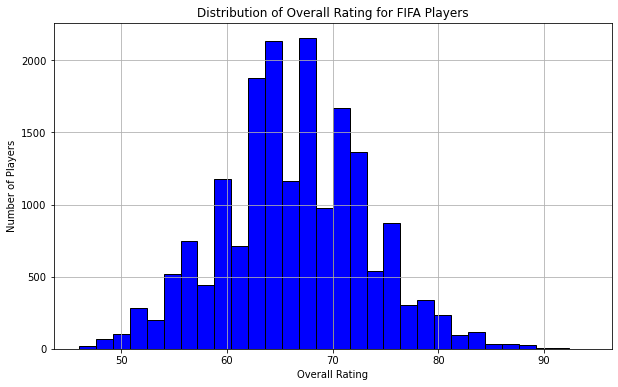

In [25]:
# Plotting the distribution of the 'Overall' rating 
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Overall'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Overall Rating for FIFA Players')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

### Findings:

The distribution of the overall ratings for FIFA players shows that most players have ratings concentrated between 60 and 80. The distribution is slightly right-skewed, indicating that there are fewer players with very high ratings (above 85). The peak of the distribution is around the 65-70 rating range, which represents the most common player rating.

## 11. Retrieve the names of top20 players based on the Overall rating.

In [26]:
# Sorting the dataframe by 'Overall' rating in descending order and selecting the top 20
df_cleaned.sort_values(by='Overall', ascending=False).head(20)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023.0,L. Messi,31.0,Argentina,94.0,94.0,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801.0,Cristiano Ronaldo,33.0,Portugal,94.0,94.0,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871.0,Neymar Jr,26.0,Brazil,92.0,93.0,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080.0,De Gea,27.0,Spain,91.0,93.0,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985.0,K. De Bruyne,27.0,Belgium,91.0,92.0,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277.0,E. Hazard,27.0,Belgium,91.0,91.0,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003.0,L. Modrić,32.0,Croatia,91.0,91.0,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580.0,L. Suárez,31.0,Uruguay,91.0,91.0,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862.0,Sergio Ramos,32.0,Spain,91.0,91.0,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493.0,D. Godín,32.0,Uruguay,90.0,90.0,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


## 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [27]:
# Sorting the dataframe by 'Overall' rating in descending order and selecting the top 20 and assign to a dataframe
top_20_players_full_info = df_cleaned.sort_values(by='Overall', ascending=False).head(20)

# Display the top 20 players dataframe with all their information
print(top_20_players_full_info)

          ID               Name   Age Nationality  Overall  Potential  \
0   158023.0           L. Messi  31.0   Argentina     94.0       94.0   
1    20801.0  Cristiano Ronaldo  33.0    Portugal     94.0       94.0   
2   190871.0          Neymar Jr  26.0      Brazil     92.0       93.0   
3   193080.0             De Gea  27.0       Spain     91.0       93.0   
4   192985.0       K. De Bruyne  27.0     Belgium     91.0       92.0   
5   183277.0          E. Hazard  27.0     Belgium     91.0       91.0   
6   177003.0          L. Modrić  32.0     Croatia     91.0       91.0   
7   176580.0          L. Suárez  31.0     Uruguay     91.0       91.0   
8   155862.0       Sergio Ramos  32.0       Spain     91.0       91.0   
12  182493.0           D. Godín  32.0     Uruguay     90.0       90.0   
13  168542.0        David Silva  32.0       Spain     90.0       90.0   
9   200389.0           J. Oblak  25.0    Slovenia     90.0       93.0   
11  182521.0           T. Kroos  28.0     Germany  

## 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)

In [28]:
# Calculate the average "Age" of the top 20 players
average_age_years = top_20_players_full_info['Age'].mean()

# Convert the decimal years into years, months, and days
years = int(average_age_years)
months = int((average_age_years - years) * 12)
days = int((((average_age_years - years) * 12) - months) * 30)

# Calculate the average "Wage" of the top 20 players (assuming Wage is already numeric)
average_wage = top_20_players_full_info['Wage'].mean()

# Print the results with appropriate labels
# Print the results with appropriate labels
print(f"The average age of the top 20 players is: {years} years, {months} months, and {days} days")
print(f"The average wage of the top 20 players is: €{average_wage:.2f}")

The average age of the top 20 players is: 29 years, 6 months, and 18 days
The average wage of the top 20 players is: €294950.00


## 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [29]:
# Find the player with the highest wage among the top 20 players
player_with_highest_wage = top_20_players_full_info.loc[top_20_players_full_info['Wage'].idxmax()]

# Extract the name and wage of the player
highest_wage_player_name = player_with_highest_wage['Name']
highest_wage_amount = player_with_highest_wage['Wage']

# Display the result
print(f"The player with the highest wage is {highest_wage_player_name} with a wage of €{highest_wage_amount} per week.")

The player with the highest wage is L. Messi with a wage of €565000.0 per week.


## 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

* Find the average Overall rating for each club
* Display the average overall rating of Top10 Clubs using a plot


Top 10 Clubs by Average Overall Rating:
                    Club  Average Overall Rating
326             Juventus               82.280000
398               Napoli               80.000000
315                Inter               79.750000
470          Real Madrid               78.242424
382                Milan               78.074074
212         FC Barcelona               78.030303
435  Paris Saint-Germain               77.433333
482                 Roma               77.423077
375    Manchester United               77.242424
504           SL Benfica               77.000000


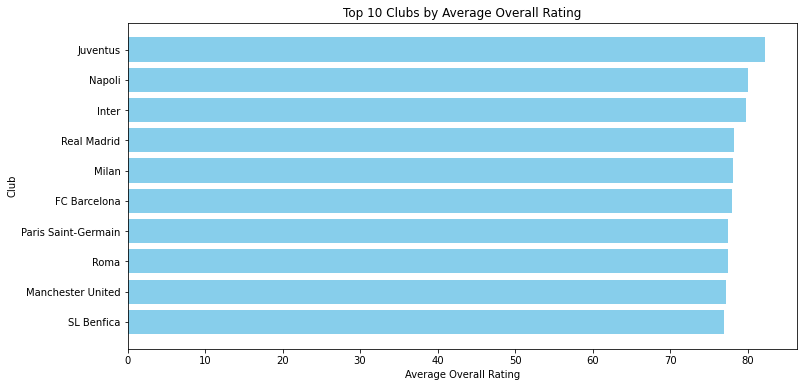

In [30]:
# Generate a dataframe with the "Player name", "Club Name", "Wage", and "Overall rating"
player_club_wage_overall_df = df_cleaned[['Name', 'Club', 'Wage', 'Overall']]

# Find the average Overall rating for each club
average_overall_per_club = player_club_wage_overall_df.groupby('Club')['Overall'].mean().reset_index()

# Rename the columns for clarity
average_overall_per_club.columns = ['Club', 'Average Overall Rating']

# Sort the clubs by their average overall rating and select the top 10
top_10_clubs = average_overall_per_club.sort_values(by='Average Overall Rating', ascending=False).head(10)

# Display the top 10 clubs with appropriate labels
print("\nTop 10 Clubs by Average Overall Rating:")
print(top_10_clubs)

# Plotting the average overall rating of the top 10 clubs
plt.figure(figsize=(12, 6))
plt.barh(top_10_clubs['Club'], top_10_clubs['Average Overall Rating'], color='skyblue')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club')
plt.title('Top 10 Clubs by Average Overall Rating')
plt.gca().invert_yaxis()  # To have the highest rating at the top
plt.show()


## 16. What is the relationship between age and individual potential of the player? 
## Visualize the relationship with appropriate plot and Comment on the same.

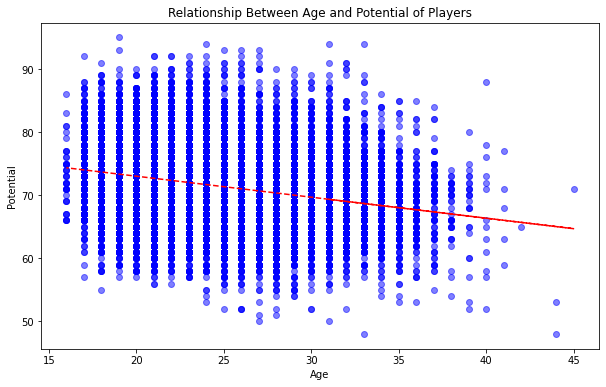

In [31]:
# Create a scatter plot for Age vs Potential
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Potential'], alpha=0.5, color='blue')
plt.title('Relationship Between Age and Potential of Players')
plt.xlabel('Age')
plt.ylabel('Potential')

# Add a trend line (using a linear fit)
z = np.polyfit(df_cleaned['Age'], df_cleaned['Potential'], 1)
p = np.poly1d(z)
plt.plot(df_cleaned['Age'], p(df_cleaned['Age']), "r--")

plt.show()

### Analysis of the Findings on the Relationship Between Age and Potential of Players

The scatter plot you provided shows the relationship between the age of players (on the x-axis) and their potential (on the y-axis). The red trend line helps to visualize the overall trend of this relationship.

#### Key Observations:
1. **General Trend**:
   - The trend line is sloping downwards, which indicates a **negative correlation** between age and potential. This suggests that as players get older, their potential generally decreases.

2. **Young Players**:
   - For players in the younger age range (around 15-25 years old), potential is relatively high and more varied, with many players having potential ratings in the range of 70-90.

3. **Mid-Age Players**:
   - As players age (around 26-30 years), the potential tends to be slightly lower on average, though there are still some players with high potential. The spread of potential ratings begins to narrow.

4. **Older Players**:
   - For older players (over 30 years old), the potential ratings drop more significantly. There are fewer players with very high potential (above 80), and most players' potential ratings fall between 60 and 75.

5. **Outliers**:
   - There are some outliers, such as a few older players with unusually high or low potential compared to others in their age group. These outliers could be exceptional talents or cases where the potential hasn't been realized as expected.

#### Conclusion:
The analysis suggests that **younger players generally have higher potential**, which aligns with the expectation that younger players are still developing and have room to improve. As players age, they tend to reach their peak, and their potential diminishes, likely because they have less room for development and are closer to their maximum capabilities.

This trend is typical in sports, where younger athletes are often seen as more promising prospects with the potential to grow, while older athletes may have already reached or are nearing their peak performance. 

**The scatter plot and trend line effectively illustrate this relationship in the dataset.**

## 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.
- (hint: use potential, Overall, value, international reputation, and Release Clause)


To determine which features directly contribute to the wages of the players, one can use a correlation analysis. Correlation measures the strength and direction of the relationship between two variables. In this context, we'll calculate the correlation between the players' wages and various features such as Potential, Overall, Value, International Reputation, and Release Clause.

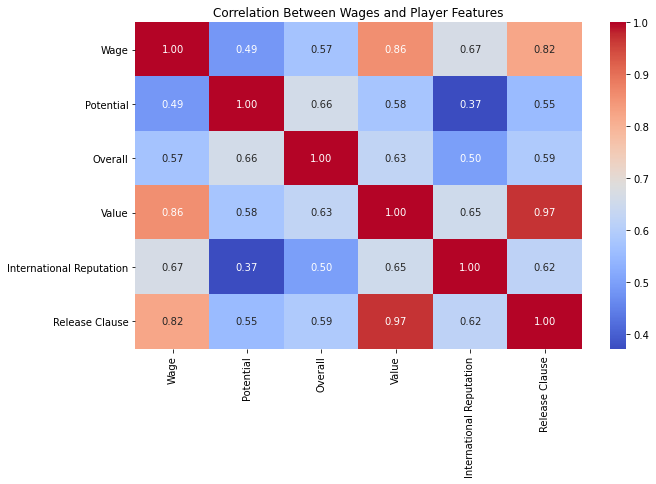

In [32]:
# Select the relevant features including Wage
features = ['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Wages and Player Features')
plt.show()

### Analysis of the Heatmap: Correlation Between Wages and Player Features

The heatmap above shows the correlation between players' wages and several key features: Potential, Overall, Value, International Reputation, and Release Clause. The correlation coefficients in the heatmap range from -1 to 1, where:
- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

#### Key Observations:

1. **Wage vs. Overall Rating (0.86)**:
   - The strongest positive correlation is between **Wage** and **Overall Rating**. This high correlation (0.86) suggests that a player's overall rating is the most significant factor contributing to their wage. Players with higher overall ratings tend to earn significantly higher wages.

2. **Wage vs. Release Clause (0.82)**:
   - The next strongest correlation is between **Wage** and **Release Clause** (0.82). This suggests that players with higher release clauses (which often reflect a player's market value and desirability) tend to have higher wages. Clubs likely pay more to retain valuable players by offering them higher wages.

3. **Wage vs. Value (0.67)**:
   - There is also a strong positive correlation between **Wage** and **Value** (0.67). This indicates that players with a higher market value generally command higher wages. Market value reflects a player's perceived worth, and clubs often align wages with this value.

4. **Wage vs. Potential (0.49)**:
   - The correlation between **Wage** and **Potential** is moderate (0.49). While potential is a factor in determining wages, it is less influential than the overall rating, release clause, or value. This makes sense because potential represents future performance, while wages are often based on current performance and value.

5. **Wage vs. International Reputation (0.57)**:
   - There is a moderate positive correlation (0.57) between **Wage** and **International Reputation**. This suggests that players who are well-known internationally tend to earn higher wages. This can be due to their marketability and the prestige they bring to a club, even if their current performance is not the highest.

#### Conclusion:
- **Overall Rating** and **Release Clause** are the most significant contributors to a player's wage, followed by **Value**. These features strongly influence how much a player earns.
- **Potential** and **International Reputation** also contribute to wages, but to a lesser extent.
- Clubs likely base wages primarily on a player's current performance and market factors, such as their overall rating and the contractual value represented by the release clause.

This analysis helps us understand that while several factors influence a player's wage, current performance metrics like the overall rating and contractual aspects like the release clause are the most decisive.

## 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

Position with the maximum number of players: ST (2212 players)
Position with the minimum number of players: LF (15 players)


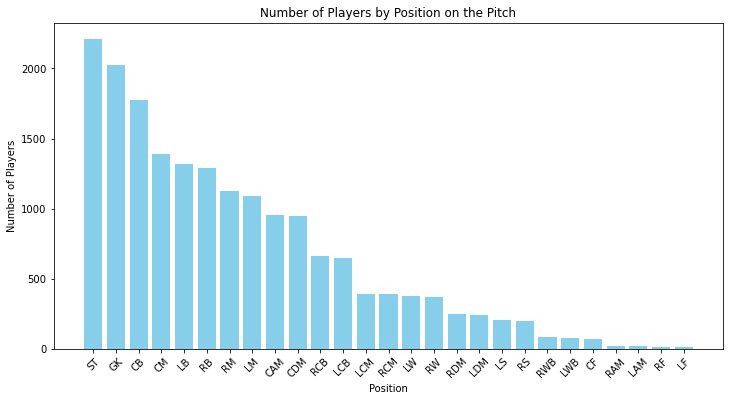

In [33]:
# Grouping the players by their position and counting the number of players in each position
position_counts = df_cleaned['Position'].value_counts()

# Finding the position with the maximum and minimum number of players
max_position = position_counts.idxmax()
min_position = position_counts.idxmin()

# Displaying the positions with the maximum and minimum number of players
print(f"Position with the maximum number of players: {max_position} ({position_counts[max_position]} players)")
print(f"Position with the minimum number of players: {min_position} ({position_counts[min_position]} players)")

# Plotting the distribution of players across different positions
plt.figure(figsize=(12, 6))
plt.bar(position_counts.index, position_counts.values, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position on the Pitch')
plt.xticks(rotation=45)
plt.show()

## 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. 

In [34]:
# Filtering the dataframe for players who are from 'Juventus' and have a wage greater than 200K
juventus_high_wage_players = df_cleaned[(df_cleaned['Club'] == 'Juventus') & (df_cleaned['Wage'] > 200000)]

# Selecting specific columns for better readability
columns_to_display = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Wage', 'Position', 'Value', 'Release Clause']

# Display the dataframe in a well-formatted table using tabulate
print(tabulate(juventus_high_wage_players[columns_to_display], headers='keys', tablefmt='psql'))

+----+-------------------+-------+---------------+-----------+-------------+----------+--------+------------+---------+------------------+
|    | Name              |   Age | Nationality   |   Overall |   Potential | Club     |   Wage | Position   |   Value |   Release Clause |
|----+-------------------+-------+---------------+-----------+-------------+----------+--------+------------+---------+------------------|
|  1 | Cristiano Ronaldo |    33 | Portugal      |        94 |          94 | Juventus | 405000 | ST         | 7.7e+07 |        1.271e+08 |
| 15 | P. Dybala         |    24 | Argentina     |        89 |          94 | Juventus | 205000 | LF         | 8.9e+07 |        1.535e+08 |
| 24 | G. Chiellini      |    33 | Italy         |        89 |          89 | Juventus | 215000 | LCB        | 2.7e+07 |        4.46e+07  |
+----+-------------------+-------+---------------+-----------+-------------+----------+--------+------------+---------+------------------+


## 20. Generate a data frame containing top 5 players by Overall rating for each unique position.

In [35]:
# Sorting the DataFrame by 'Position' and 'Overall' rating in descending order
df_sorted = df_cleaned.sort_values(by=['Position', 'Overall'], ascending=[True, False])

# Group by 'Position' and get the top 5 players by 'Overall' rating for each position
top_5_per_position = df_sorted.groupby('Position').head(5)

# Selecting specific columns for a clearer display
columns_to_display = ['Name', 'Position', 'Overall', 'Club', 'Wage', 'Value', 'Nationality']

# Method 1: Display the result in a single, unified table
print("Top 5 Players by Overall Rating for Each Position (Unified Table):")
print(tabulate(top_5_per_position[columns_to_display], headers='keys', tablefmt='psql'))

Top 5 Players by Overall Rating for Each Position (Unified Table):
+------+---------------------+------------+-----------+--------------------------------+--------+-----------+---------------------+
|      | Name                | Position   |   Overall | Club                           |   Wage |     Value | Nationality         |
|------+---------------------+------------+-----------+--------------------------------+--------+-----------+---------------------|
|   17 | A. Griezmann        | CAM        |        89 | Atlético Madrid                | 145000 | 7.8e+07   | France              |
|   31 | C. Eriksen          | CAM        |        88 | Tottenham Hotspur              | 205000 | 7.35e+07  | Denmark             |
|   61 | Roberto Firmino     | CAM        |        86 | Liverpool                      | 195000 | 5.3e+07   | Brazil              |
|   66 | T. Müller           | CAM        |        86 | FC Bayern München              | 135000 | 4.5e+07   | Germany             |
|   74 | 

In [36]:
# Method 2: Display with separation between groups for better readability
print("\nTop 5 Players by Overall Rating for Each Position (With Separation):")
grouped = top_5_per_position.groupby('Position')

for position, group in grouped:
    print(f"\nPosition: {position}")
    print(tabulate(group[columns_to_display], headers='keys', tablefmt='psql'))
    print("\n" + "-"*80 + "\n")  # Add a separator line between groups


Top 5 Players by Overall Rating for Each Position (With Separation):

Position: CAM
+----+-----------------+------------+-----------+-------------------+--------+----------+---------------+
|    | Name            | Position   |   Overall | Club              |   Wage |    Value | Nationality   |
|----+-----------------+------------+-----------+-------------------+--------+----------+---------------|
| 17 | A. Griezmann    | CAM        |        89 | Atlético Madrid   | 145000 | 7.8e+07  | France        |
| 31 | C. Eriksen      | CAM        |        88 | Tottenham Hotspur | 205000 | 7.35e+07 | Denmark       |
| 61 | Roberto Firmino | CAM        |        86 | Liverpool         | 195000 | 5.3e+07  | Brazil        |
| 66 | T. Müller       | CAM        |        86 | FC Bayern München | 135000 | 4.5e+07  | Germany       |
| 74 | M. Özil         | CAM        |        86 | Arsenal           | 190000 | 4.35e+07 | Germany       |
+----+-----------------+------------+-----------+------------------

+-----+---------------+------------+-----------+---------------------+--------+----------+---------------+

--------------------------------------------------------------------------------


Position: RCB
+----+--------------+------------+-----------+---------------------+--------+---------+---------------+
|    | Name         | Position   |   Overall | Club                |   Wage |   Value | Nationality   |
|----+--------------+------------+-----------+---------------------+--------+---------+---------------|
|  8 | Sergio Ramos | RCB        |        91 | Real Madrid         | 380000 | 5.1e+07 | Spain         |
| 39 | Thiago Silva | RCB        |        88 | Paris Saint-Germain | 165000 | 2.4e+07 | Brazil        |
| 54 | Piqué        | RCB        |        87 | FC Barcelona        | 240000 | 3.4e+07 | Spain         |
| 62 | R. Varane    | RCB        |        86 | Real Madrid         | 210000 | 5e+07   | France        |
| 70 | L. Bonucci   | RCB        |        86 | Juventus            

+----+-------------------+------------+-----------+-------------------+--------+----------+---------------+
|    | Name              | Position   |   Overall | Club              |   Wage |    Value | Nationality   |
|----+-------------------+------------+-----------+-------------------+--------+----------+---------------|
|  1 | Cristiano Ronaldo | ST         |        94 | Juventus          | 405000 | 7.7e+07  | Portugal      |
| 10 | R. Lewandowski    | ST         |        90 | FC Bayern München | 205000 | 7.7e+07  | Poland        |
| 16 | H. Kane           | ST         |        89 | Tottenham Hotspur | 205000 | 8.35e+07 | England       |
| 23 | S. Agüero         | ST         |        89 | Manchester City   | 300000 | 6.45e+07 | Argentina     |
| 36 | G. Bale           | ST         |        88 | Real Madrid       | 355000 | 6e+07    | Wales         |
+----+-------------------+------------+-----------+-------------------+--------+----------+---------------+

---------------------------

## 21. What is the average wage one can expect to pay for the top 5 players in every position? 
- (use the data frame created in Q19)
- In Q19 the data frame created is **juventus_high_wage_players**

In [37]:
# Group by 'Position' and calculate the average wage for the top 5 players in each position
average_wage_per_position = juventus_high_wage_players.groupby('Position')['Wage'].mean().reset_index()

# Rename the columns for clarity
average_wage_per_position.columns = ['Position', 'Average Wage']

# Display the result in a readable format using tabulate
print("Average Wage for Top 5 Players in Every Position:")
print(tabulate(average_wage_per_position, headers='keys', tablefmt='psql'))

Average Wage for Top 5 Players in Every Position:
+----+------------+----------------+
|    | Position   |   Average Wage |
|----+------------+----------------|
|  0 | LCB        |         215000 |
|  1 | LF         |         205000 |
|  2 | ST         |         405000 |
+----+------------+----------------+


# Thank you